In [103]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [104]:
current = os.getcwd()
os.listdir(current)

['EndSem LAB - Notebook-Copy1.ipynb',
 'mask.jpg',
 'SET - 9',
 'EndSem LAB - Notebook.ipynb',
 'Untitled.ipynb',
 '.ipynb_checkpoints',
 'end_sem_21011101138-Copy1.ipynb',
 'end_sem_21011101138.ipynb']

In [105]:
set_9 = os.path.join(current,'SET - 9')
os.listdir(set_9)

['water_body_Mask.jpg', 'QUESTION.txt', 'water_body.jpg']

In [106]:
img_path = os.path.join(set_9,'water_body.jpg')
masked_img_path = os.path.join(set_9,'water_body_Mask.jpg')

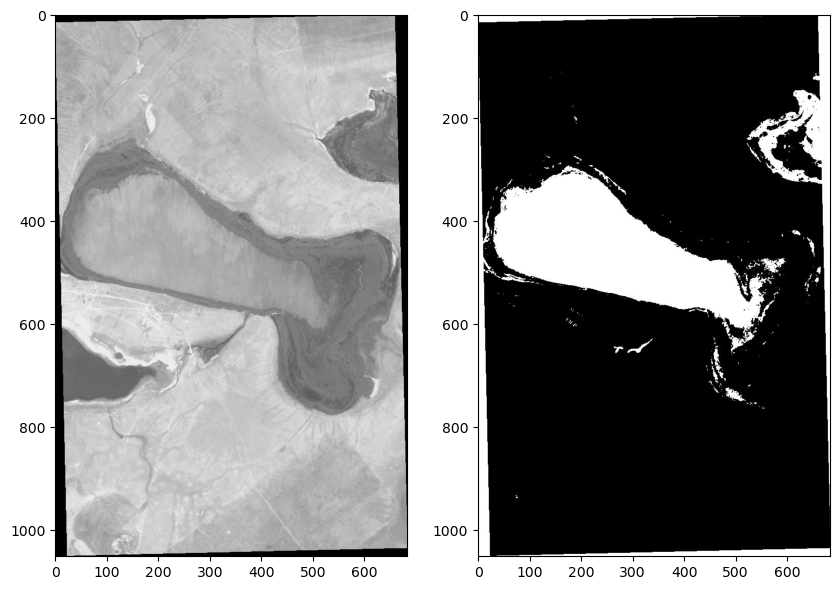

In [139]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ground_truth = cv2.imread(masked_img_path,0)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(ground_truth,cmap='gray')

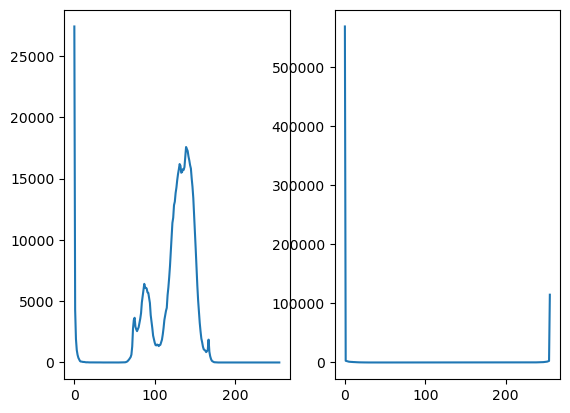

In [108]:
plt.subplot(1,2,1)
histr_img = cv2.calcHist([img],[0],None,[256],[0,256])  
plt.plot(histr_img) 
plt.subplot(1,2,2)
histr_gt = cv2.calcHist([ground_truth],[0],None,[256],[0,256])  
plt.plot(histr_gt) 
plt.show() 

In [109]:
img.shape

(1051, 684)

In [110]:
img_copy = img.copy()

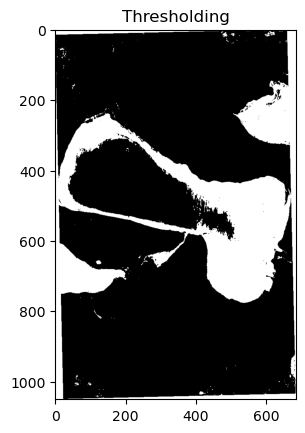

In [112]:
THRESH = 110

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = np.where(img > 10, img, 255)

_, t_mask = cv2.threshold(img, THRESH, 255, cv2.THRESH_BINARY_INV)

plt.title("Thresholding")
plt.imshow(t_mask, cmap="gray")

In [113]:
cv2.imwrite('mask.jpg',t_mask)

True

### NOISE REMOVAL AND MORPHOLOGICAL TRANSFORMATIONS

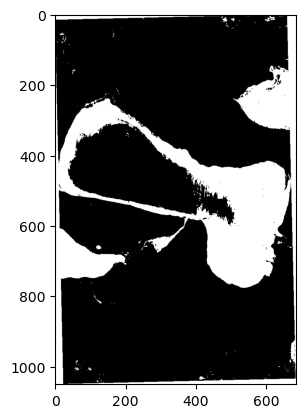

In [114]:
image = cv2.imread('mask.jpg',0)
plt.imshow(image,cmap='gray')

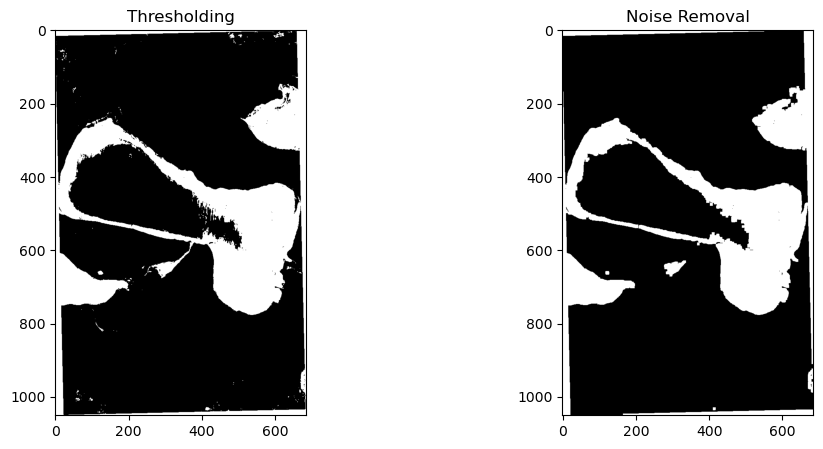

In [115]:
ret, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 3)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Thresholding")
plt.imshow(thresh, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Noise Removal")
plt.imshow(opening, cmap="gray")

plt.show()

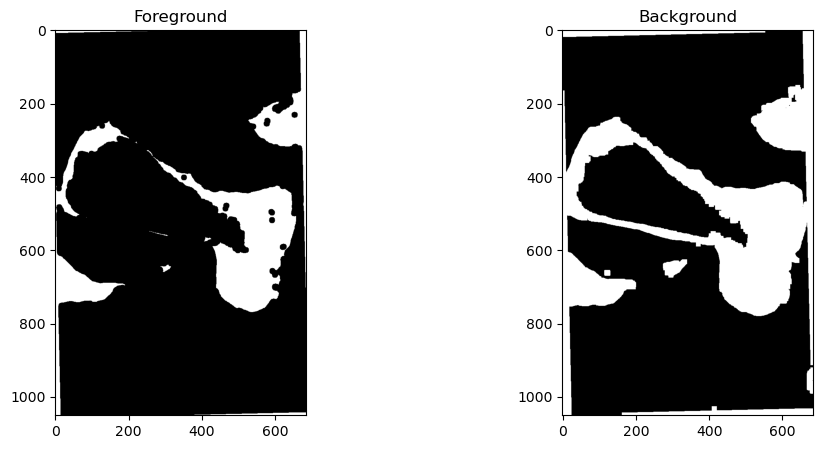

In [116]:
# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.1*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Foreground")
plt.imshow(sure_fg, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Background")
plt.imshow(sure_bg, cmap="gray")


plt.show()

In [117]:
masked_img = cv2.add(sure_fg ,sure_bg)

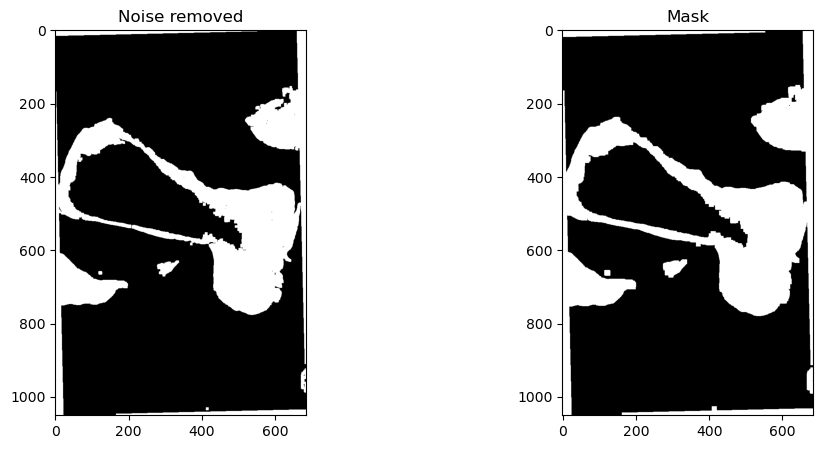

In [118]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Noise removed")
plt.imshow(opening, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Mask")
plt.imshow(masked_img, cmap="gray")


plt.show()

In [119]:
masked_img.shape

(1051, 684)

([<matplotlib.axis.YTick at 0x7f4a34658dd0>,
 [Text(0, 0, '0'),
  Text(0, 50, '50'),
  Text(0, 100, '100'),
  Text(0, 150, '150'),
  Text(0, 200, '200'),
  Text(0, 250, '250'),
  Text(0, 300, '300'),
  Text(0, 350, '350'),
  Text(0, 400, '400'),
  Text(0, 450, '450'),
  Text(0, 500, '500'),
  Text(0, 550, '550'),
  Text(0, 600, '600'),
  Text(0, 650, '650'),
  Text(0, 700, '700'),
  Text(0, 750, '750'),
  Text(0, 800, '800'),
  Text(0, 850, '850'),
  Text(0, 900, '900'),
  Text(0, 950, '950'),
  Text(0, 1000, '1000'),
  Text(0, 1050, '1050')])

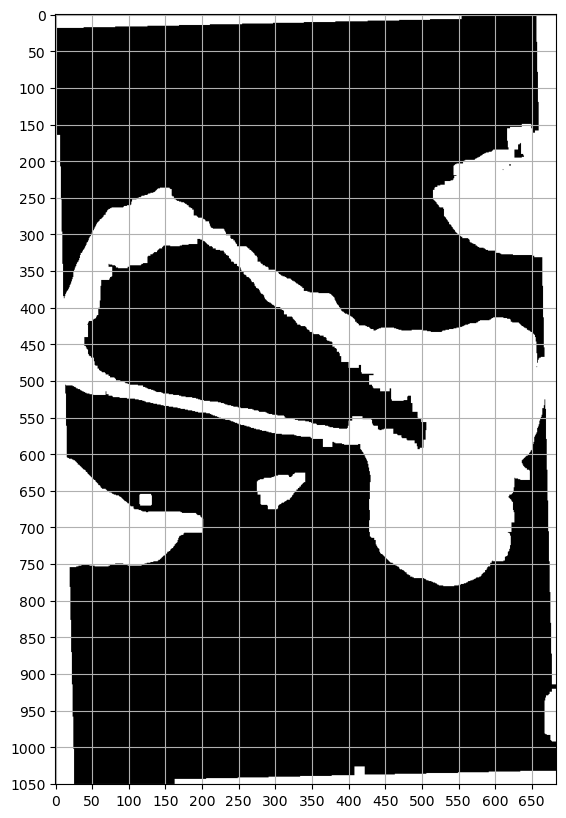

In [120]:
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.grid(axis='both', which='both')
plt.imshow(masked_img,cmap='gray')
plt.xticks([i for i in range(0,masked_img.shape[1],50)])
plt.yticks([i for i in range(0,masked_img.shape[0],50)])

In [121]:
masked_img_copy = masked_img.copy()

In [122]:
index_list = []
for i in range(masked_img.shape[0]):
    for j in range(masked_img.shape[1]):
        if i>350 and i<500:
            if j >50 and j < 300:
                index_list.append([i,j])

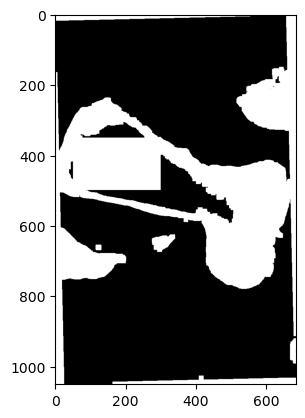

In [123]:
for index in index_list:
    masked_img_copy[index[0],index[1]] = 255

plt.imshow(masked_img_copy,cmap='gray')

### METRICS

In [75]:
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp

In [76]:
print("MSE: ", mse(masked_img,ground_truth))
print("PSNR: ", psnr(masked_img, ground_truth))
print("SSIM: ", ssim(masked_img, ground_truth))

MSE:  16631.13017399191
PSNR:  5.921585980193653
SSIM:  (0.6448941636782284, 0.8121622736622971)


### USING CLUSTERING

In [124]:
img = cv2.imread(img_path)

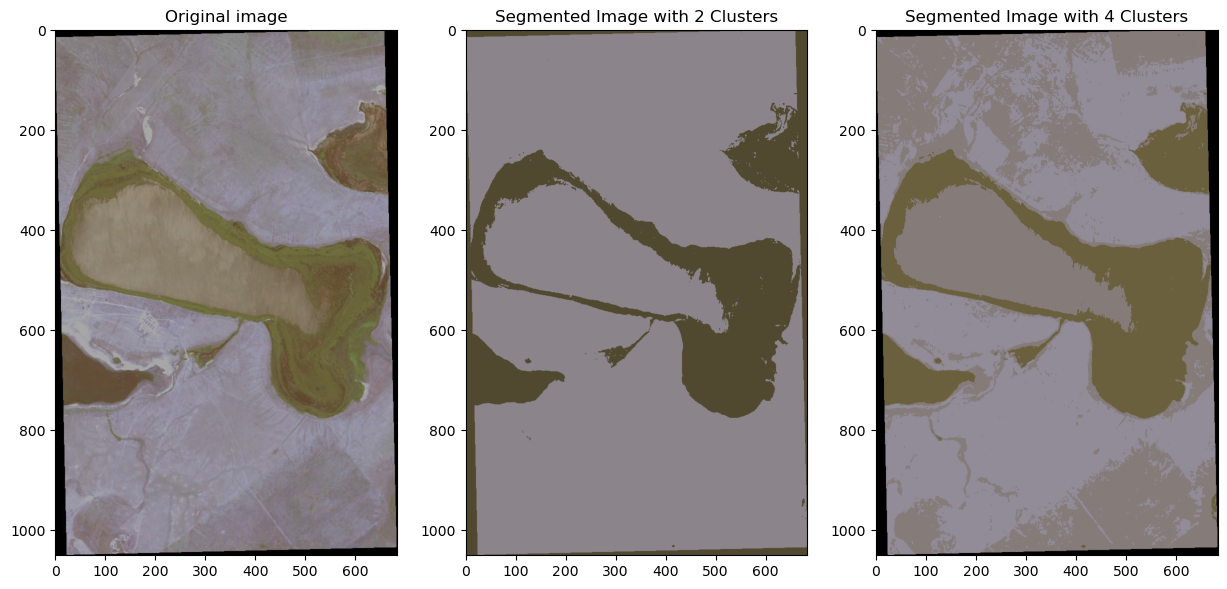

In [132]:
image = img
pixel_values = image.reshape((-1,3))
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,100,0.2)
num_clusters_list = [2,4]
plt.figure(figsize=(15,8))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original image')


for i, num_clusters in enumerate(num_clusters_list):
    _, labels, centers = cv2.kmeans(pixel_values, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert back to 8-bit values
    centers = np.uint8(centers)

    # Map the labels to the centers
    segmented_image = centers[labels.flatten()]

    # Reshape back to the original image shape
    segmented_image = segmented_image.reshape(image.shape)

    # Plot the segmented image
    plt.subplot(1, 3, i+2)
    plt.imshow(segmented_image)
    plt.title('Segmented Image with {} Clusters'.format(num_clusters))

plt.show()


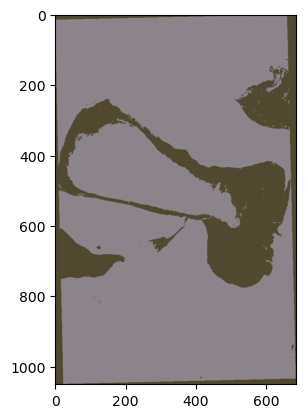

In [133]:
_, labels, centers = cv2.kmeans(pixel_values, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8-bit values
centers = np.uint8(centers)

# Map the labels to the centers
segmented_image = centers[labels.flatten()]

# Reshape back to the original image shape
segmented_image = segmented_image.reshape(image.shape)

# Plot the segmented image
plt.imshow(segmented_image)

In [130]:
segmented_image.shape

(1051, 684, 3)

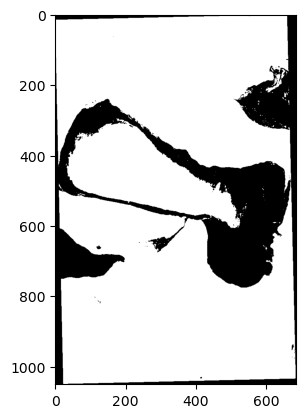

In [134]:
seg_gray_img = cv2.cvtColor(segmented_image,cv2.COLOR_BGR2GRAY)
plt.imshow(seg_gray_img,cmap='gray')

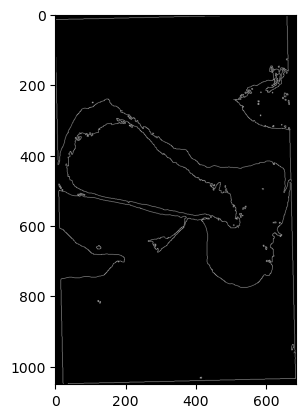

In [136]:
img_blur = cv2.GaussianBlur(seg_gray_img, (3,3), 0) 
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
plt.imshow(edges,cmap='gray')

In [143]:
edge_pixels = edges.reshape(-1)
len(edge_pixels)

718884

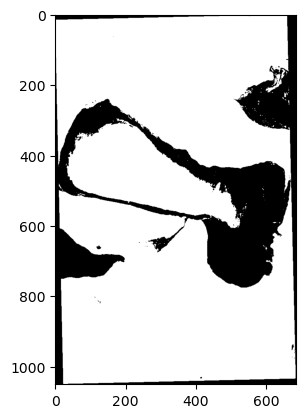

In [138]:
ret, thresh = cv2.threshold(seg_gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
plt.imshow(thresh, cmap="gray")
plt.show()

In [144]:
print("MSE: ", mse(seg_gray_img,ground_truth))
print("PSNR: ", psnr(seg_gray_img, ground_truth))
print("SSIM: ", ssim(seg_gray_img, ground_truth))

MSE:  17179.516535352017
PSNR:  5.780694230830018
SSIM:  (0.07654664064104622, 0.812765047381267)
